This notebook is for fitting the S2 anisotropy of water using the optical kerr effect response from Caster (1995).  

# inputs

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import h5py
import sys
import os
import time
import scipy
import scipy.io as scio
from scipy.optimize import curve_fit


from LCLSDataToolsNew.GeneralTools import *
from LCLSDataToolsNew.filterTools import *
from LCLSDataToolsNew.diffSignalTools import *
from LCLSDataToolsNew.binningToolsErr import *
from LCLSDataToolsNew.anisotropyToolsAll import *
from LCLSDataToolsNew.SVDTools import *
from LCLSDataToolsNew.SetUpFns import *
from LCLSDataToolsNew.DiffBinFns import *
from LCLSDataToolsNew.ReduceFns import *
from LCLSDataToolsNew.IRFtools import *
from LCLSDataToolsNew.plottingTools import *

print('Import Complete!')

exper = 'xcsl1008621'

### s3df ###
smalldata_folder='/sdf/data/lcls/ds/xcs/'+exper+'/hdf5/smalldata/'


outpath='/sdf/data/lcls/ds/xcs/'+exper+'/results/ReducedData/'

# #make directories if needed 
if os.path.isdir(outpath+'/figures/')==False:
    os.makedirs(outpath+'/figures/')
if os.path.isdir(outpath+'/npy/')==False:
    os.makedirs(outpath+'/npy/')



Import Complete!


# Load Data and Fit IRF

In [4]:
runnum=228
filepath=outpath+'/npy/'+exper+'_Run%04i_out.npy' %runnum
# filepath='/cds/home/s/slraj/code/ScatteringCode/npy/xcsly3420_Run0120_out.npy'
# filepath='/reg/d/psdm/xcs/xcsx51920/results/ReferenceData/xpp00316_water_data.npy'       

data= np.load(filepath,allow_pickle= True).item()
print(data.keys())
qs=data['qs']
ts=data['xcenter']*1e12
try:
    S2=data['S2']
except:
    S0,_,S2,_=S0S2P(data['diff_bin'],data['phis'],shift_n=6)


### load Castner reference OKE data####
Castner=np.loadtxt('/sdf/home/s/slraj/code/tools/ReferenceData/Castner1995figure4.dat',skiprows=3)
print('Castner trange (ps)',np.nanmin(Castner[:,0]),np.nanmax(Castner[:,0]))

dict_keys(['h5name', 'numshots', 'filters', 'normal_factor', 'loff_cake', 'xbin_occupancy', 'xcenter', 'xmean', 'xstd', 'diff_bin', 'diff_std', 'qs', 'phis', 'paramDict', 'numshots_used'])
shift is 196 degrees
33
Castner trange (ps) 0.0 6.8279934


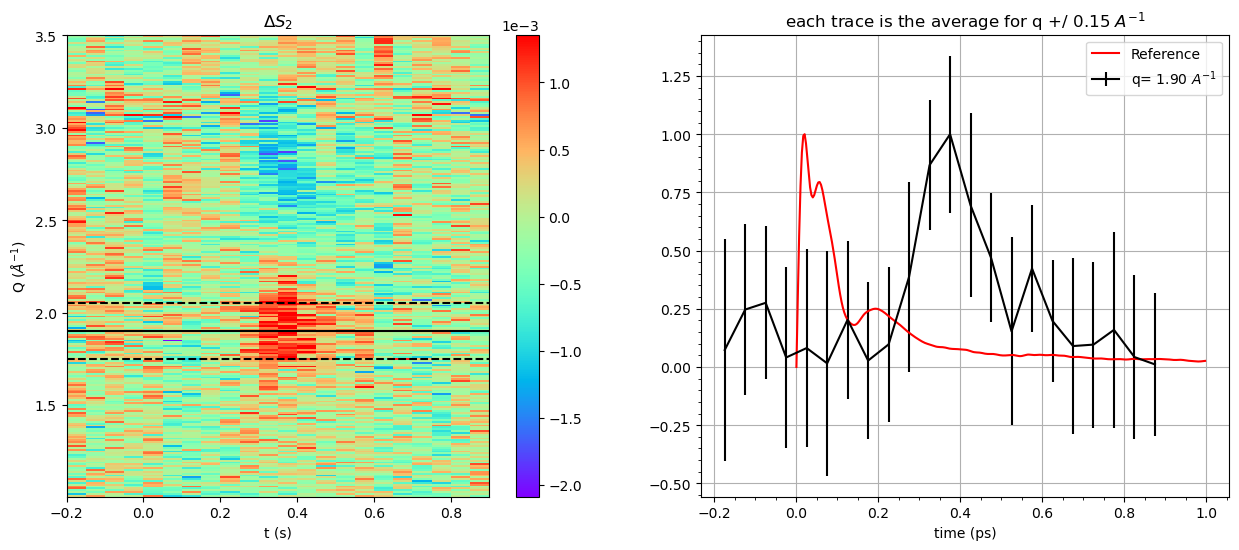

In [5]:
qCenter=1.9
qWidth=0.15
trange=(-.2,0.9)
qrange=(1.0,3.5)

S2slice,S2slice_std=IRFprep(S2,qs=qs,ts=ts,ref=Castner[:300,1],tref=Castner[:300,0],
            qCenter=qCenter,qWidth=qWidth,
            trange=trange,qrange=qrange)

chiAll shape (1190, 500)
starting calculation
finished calculation
chi min 0.4512 sigma [0.1114] fwhm [0.262347] tt0 [0.399]


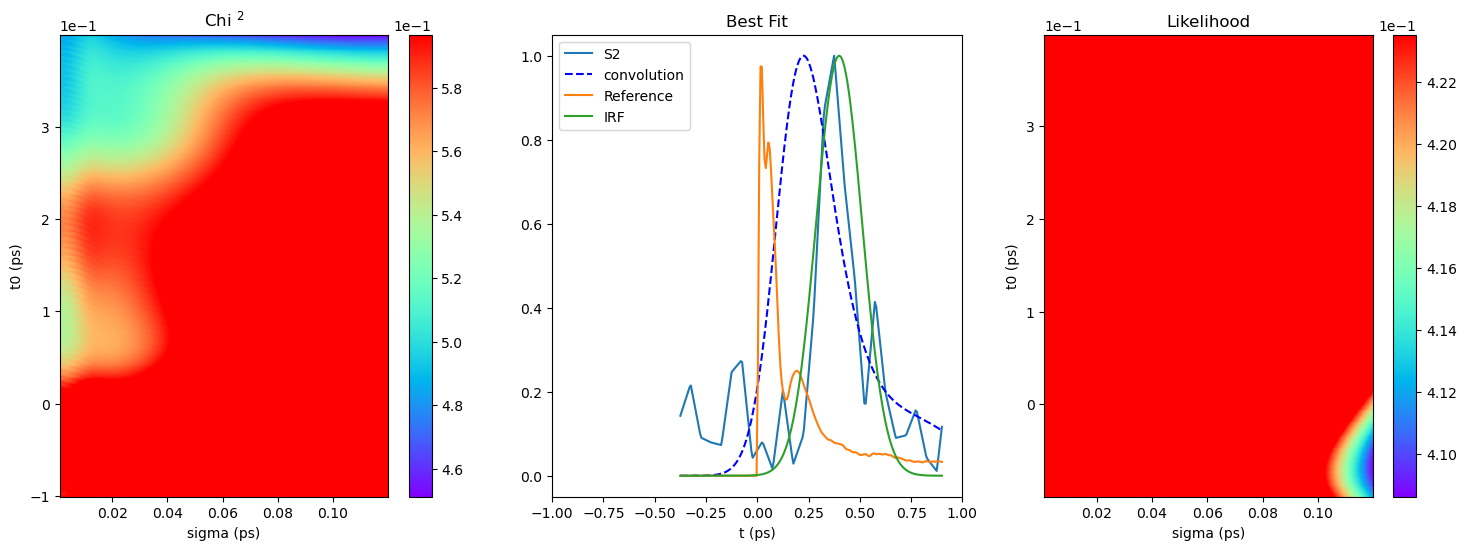

In [6]:
sigmaL=np.arange(0.001,0.12,0.0001)
tt0L=np.arange(-0.1,0.4,0.001)
trange=(-.4,0.9)

chiAll,likeAll=doIRFfit(S2slice,S2slice_std,qs=qs,ts=ts,ref=Castner[:300,1],tref=Castner[:300,0],
                        tt0L=tt0L,sigmaL=sigmaL,trange=trange)